In [1]:
import numpy as np
from sklearn.externals import joblib
import copy
import random
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.base import clone
from sklearn import metrics
import matplotlib as mp

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
mp.rcParams.update({'font.size': 22})

In [4]:
datadict = joblib.load("Two_Port_Standard_Dictionary_Cleaned_Interpolated.pkl")

In [5]:
num_fake_points = 15000
magS11_deviation = 0.003
magS21_deviation = 0.0001
magS22_deviation = 0.003
frequency_range = np.linspace(2,18,50)

In [6]:
magS11_points = []
magS21_points = []
magS22_points = []
for i in range(num_fake_points):
    new_dataset = copy.deepcopy(datadict['CTN210']['System 2,7'][random.choice(datadict['CTN210']['System 2,7'].keys())])
    new_dataset["magS11"] += np.random.normal(0,magS11_deviation,50)
    new_dataset["magS21"] += np.random.normal(0,magS21_deviation,50)
    new_dataset["magS22"] += np.random.normal(0,magS22_deviation,50)
    magS11_points.append(new_dataset["magS11"].tolist())
    magS21_points.append(new_dataset["magS21"].tolist())
    magS22_points.append(new_dataset["magS22"].tolist())
magS11_arr = np.array(magS11_points)
magS21_arr = np.array(magS21_points)
magS22_arr = np.array(magS22_points)

In [7]:
names = ["Gaussian Naive Bayes",
         "Decision Tree",
         "Random Forest",
         "Quadratic Discriminant Analysis"]
classifiers = [GaussianNB(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               QuadraticDiscriminantAnalysis()]

In [8]:
spike_height = 0.006

In [9]:
incorrect_magS21_data = copy.deepcopy(magS21_arr)
for i in range(len(incorrect_magS21_data)):
    randindex = random.randrange(0,len(incorrect_magS21_data[i]))
    multnum = 1
    if random.random() >= 0.5:
        multnum = -1
    incorrect_magS21_data[i][randindex] = incorrect_magS21_data[i][randindex] + (spike_height*multnum)

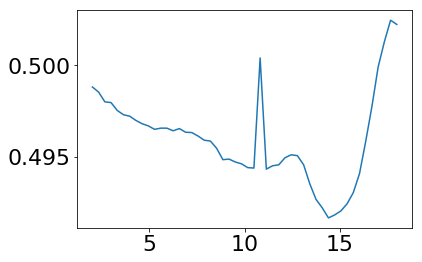

In [10]:
plt.plot(frequency_range,random.choice(incorrect_magS21_data))
plt.show()

In [11]:
S21_training_data = []
S21_training_data.extend(incorrect_magS21_data)
S21_training_data.extend(magS11_arr.tolist())
S21_training_data_arr = np.array(S21_training_data)

In [12]:
target_values = ["not valid","valid"]
S21_target_arr = np.repeat(target_values,num_fake_points)
S21_training_data_arr,S21_target_arr = shuffle(S21_training_data_arr,S21_target_arr, random_state = 0)
print len(S21_training_data_arr)
print len(S21_target_arr)

30000
30000


In [13]:
classifier_results = {}
for index in range(len(names)):
    classifier_results[names[index]] = {}

In [14]:
for index in range(len(classifiers)):
    print "Starting with " + names[index] + "!"
    classifiers[index].fit(S21_training_data_arr[:num_fake_points],S21_target_arr[:num_fake_points])
    expected = S21_target_arr[num_fake_points:]
    predicted = classifiers[index].predict(S21_training_data_arr[num_fake_points:])
    classifier_results[names[index]]["expected"] = expected
    classifier_results[names[index]]["predicted"] = predicted
print "Training and Classification have been completed!"

Starting with Gaussian Naive Bayes!
Starting with Decision Tree!
Starting with Random Forest!
Starting with Quadratic Discriminant Analysis!
Training and Classification have been completed!


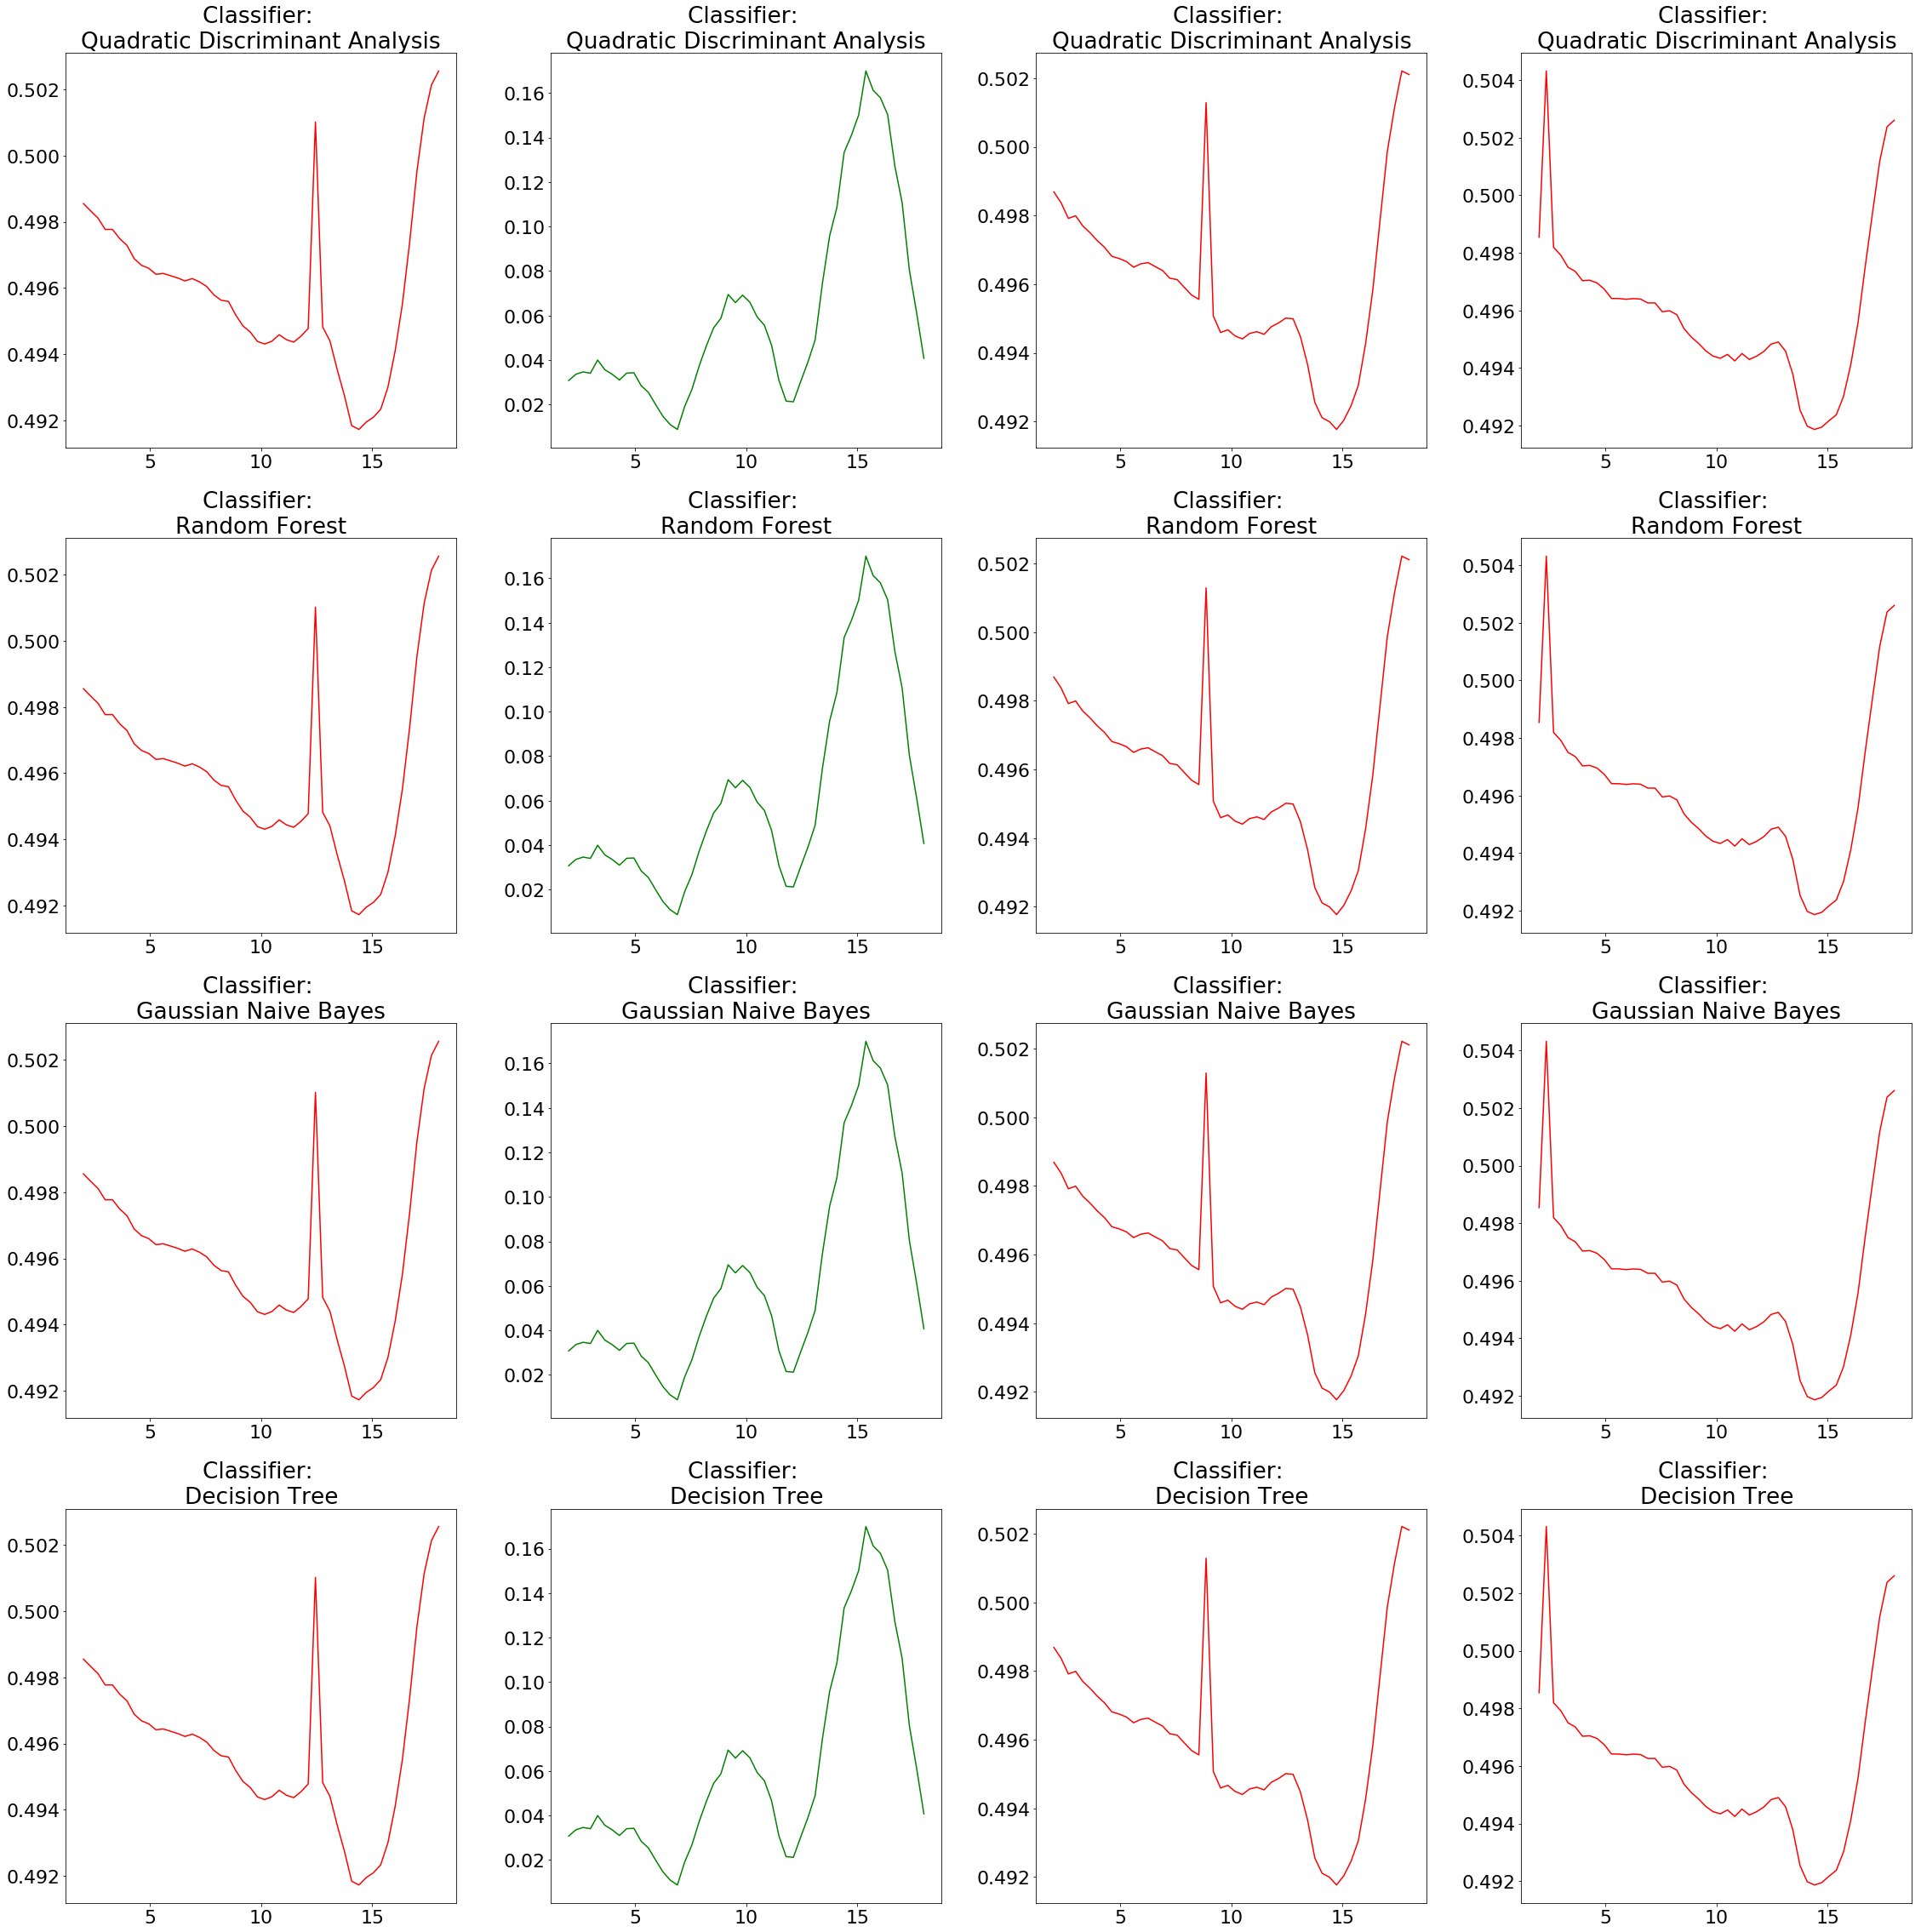

In [20]:
num_graphs_per_classifier = 4
subplotnum = 1
plt.figure(figsize=(8*num_graphs_per_classifier,8*len(classifier_results.keys())))
for key in classifier_results.keys():
    for i in range(num_graphs_per_classifier):
        plt.subplot(num_graphs_per_classifier,len(classifiers),subplotnum)
        plt.title("Classifier: \n" + key)
        if(classifier_results[key]["predicted"][i] == "valid"):
            plt.plot(frequency_range,S21_training_data_arr[num_fake_points+i],"g")
        else:
            plt.plot(frequency_range,S21_training_data_arr[num_fake_points+i],"r")
        subplotnum += 1
plt.tight_layout()
plt.show()